In [1]:
# beta  Distribution
import math
from scipy.integrate import quad
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# function take file path and value seprator
def read_Continues_Data(file_path,sep):
        file = open(file_path,'r')
        input_list =[]
        for line in file:
            input_list.extend(line.split(sep))
            # it use to remove the \n symbol that newline starts
            a  = input_list.pop()
            input_list.append(a[:-1])

        file.close()
        list1 = [round(float(x),3) for x in input_list]
        return list1

        
    
# take list of data as input and find the mean
def mean_of_data(data):
    avg = round(sum(data)/len(data),3)
    return avg

# finding variance of data
def variance_of_data(data,avg):
    # variance for sample data (n-1)
    # variance = sum([(i-avg)**2 for i in data])/len(data)-1
    
    # variance of population (n)
    variance = sum([(i-avg)**2 for i in data])/len(data)
    
    return variance

# plot the scatter plot to understand the data distribution
def scatterPlot(data):
    x = np.array(data)
    y = x[1:]
    x = x[:-1]

    plt.scatter(x, y)
    plt.show()


# Gives the element count in given intervals
def frequency(data,l_limit,u_limit):
        ele_count = 0
        for i in data:
            if i>=l_limit and i<u_limit:
                ele_count +=1
                
        return ele_count
def freq_for_graph(data,intervals):
        min_data = min(data)
        max_data = max(data)
        interval_size = round((max_data - min_data)/intervals,3)
        dic = {}
        for i in range(intervals):
            min_data = min_data + interval_size
            rang = f"({round(min_data - interval_size,3)}-{round(min_data,3)}]"
            l_limit = min_data - interval_size
            u_limit = min_data
            dic[rang] = frequency(data,l_limit,u_limit)
    
        
        if(round(u_limit,3) <= max_data):
            dic[list(dic.keys())[-1]] += 1 
            
        
        display_Freq(dic)
        return dic
        

def display_Freq(result):
        print("      Intervals                    Frequncy  ")
        print("------------------------------------------------------------")
        for (k,v) in result.items():
            print(f"    {k}              {v}     ")
            print("------------------------------------------------------------")


        print(f"        Total                   {sum(result.values())}")
        print("------------------------------------------------------------")

# plotting the histogram
def plot_histogram(dic,intervals):
    x = [i for i in range(1,intervals+1)]
    y = list(dic.values())
    plt.bar(x, y, color='g')
    return None
    
          

In [9]:

# log normal distribution parameter estimation
def find_Beta_parameters(avg,var):
    alpha = avg*(((1-avg)/var)-1)
    beta = alpha * ((1-avg)/avg)
    return alpha,beta

def B_of_alpha_gamma(al,be):
    # finding gamma values
    gamma_value_alpha,error = quad(lambda x: x**(al-1)*math.exp(-x),0.00001,float("inf"))
    print("gamma value of alpha : ", gamma_value_alpha)
    gamma_value_beta,error = quad(lambda x: x**(be-1)*math.exp(-x),0.00001,float("inf"))
    print("gamma value of beta : ",gamma_value_beta)
    gamma_value_alpha_or_beta,error = quad(lambda x: x**((al+be)-1)*math.exp(-x),0.00001,float("inf"))
    print("gamma value of alpha or beta : ",gamma_value_alpha_or_beta)
    
    b_al_be_value = (gamma_value_alpha*gamma_value_beta)/gamma_value_alpha_or_beta
    
    return b_al_be_value
    

    
    
    
###### frequency table of  Obeserve frequency(Oi),expected Frequency(Ei),(chi-square(Oi-Ei)^2/Ei) ###########################

# distribution function
def Beta_distribution(x):
    fx = (1/B_of_alpha_and_beta)*(x**(alpha_value-1))*(1-x)**(beta_value-1)
    return fx


    
# calculating the area under the curve a= lower ,b= higher
def area_Under_Curve(func,a,b,n):
    # height of each small trepezium
    h = abs(b-a)/n
    area = 0 # intilization of area as 0
    
    # calculating and sum of all small-small trapeziums
    for i in range(n):
        A = a + i * h
        B = a + (i + 1) * h
        area += (func(A) + func(B)) * h / 2 

    return area



In [4]:

# print the frequency table of given data
def frequency_table(data,intervals):
    
        min_data = min(data)    
        max_data = max(data)
        
        interval_size = round((max_data - min_data)/intervals,3)
#         dic = {}
        Freq_table = []
        
        for i in range(intervals):
            min_data = min_data + interval_size
            
#             rang = f"({round(min_data - interval_size,3)} - {round(min_data,3)}]"
            
            l_limit = round(min_data - interval_size,3)
            u_limit = round(min_data,3)
            
            # frequency function gives the number of elements in given range 
            Oi = frequency(data,l_limit,u_limit)
            
            # function gives the area of given interval on given probability function
            area = area_Under_Curve(Beta_distribution,l_limit,u_limit,10000)
            
            # Expected values for given interval
            Ei = area * len(data)
            
            # putting the Oi ,Ei,area,(Oi-Ei)^2/Ei, l_limit,u_limit
            Freq_table.append([Oi,Ei,area,(((Oi-Ei)**2)/Ei),l_limit,u_limit])
#             dic[rang] =[Oi,Ei,area,(((Oi-Ei)**2)/Ei),l_limit,u_limit]
    
        
        if(round(u_limit,3) <= max_data):
            Freq_table[-1][0] += 1
#             print("sum : ",sum([i[0] for i in Freq_table]))
        
            
        display(Freq_table)
        return Freq_table


# prints the frequency table
def display(result):
        print("      Intervals \t Frequncy_Oi \t expected Ei \t\t\t area  \t\t\t\t(Oi-Ei)^2/Ei  ")
       
        for item in result:
            print(f"    {item[-2]}-{item[-1]}\t\t{item[0]}\t\t{item[1]}\t\t{item[2]}\t\t{item[3]}    ")
            
        total_observations = sum([result[i][0] for i in range(len(result))])
        total_expected =  sum([result[i][1] for i in range(len(result))])
        total_area =  sum([result[i][2] for i in range(len(result))])
        summation_chi_square = sum([result[i][3] for i in range(len(result))])
        
       
        print("---------------------------------------------------------------------------------------------------------------------------")
        print(f"      Total \t\t  {total_observations}\t\t\t{total_expected}\t\t\t{total_area}\t\t\t{summation_chi_square}    ")




In [5]:

# merge the intervals on the given threshold frequency

def merge_chi_intervals(chi_data, threshold):
    merged_intervals = []
    current_interval = None
    current_freq_sum = 0
    current_expected_freq_sum = 0
    current_area = 0
#     current_chi_values = 0

    for interval_data in chi_data:
        freq, expected_freq,area,chi_values,lower_bound, upper_bound = interval_data
        if expected_freq < threshold:
            if current_interval is None:
                current_interval = (lower_bound, upper_bound)
                current_freq_sum = freq
                current_expected_freq_sum = expected_freq
                current_area = area
#                 current_chi_values = chi_values
            else:
                current_interval = (current_interval[0], upper_bound)
                current_freq_sum += freq
                current_expected_freq_sum += expected_freq
                current_area += area
#                 current_chi_values += chi_values
        else:
            if current_interval is not None:
                merged_intervals.append([current_freq_sum, current_expected_freq_sum,current_area,(((current_freq_sum - current_expected_freq_sum)**2)/current_expected_freq_sum),current_interval[0], current_interval[1]])
                current_interval = None
                current_freq_sum = 0
                current_expected_freq_sum = 0
                current_area = 0
#                 current_chi_values = 0
            merged_intervals.append([ freq, expected_freq,area,(((freq-expected_freq)**2)/expected_freq),lower_bound, upper_bound])

    if current_interval is not None:
        merged_intervals.append([ current_freq_sum, current_expected_freq_sum,current_area,(((current_freq_sum - current_expected_freq_sum)**2)/current_expected_freq_sum),current_interval[0], current_interval[1]])

    return merged_intervals


Enter file path : data/n4.csv
Enter file Separator :  ,
Minimum of data :   0.003
Maximum of data :   20.005
mean :  2.908
variance :  8.47741325000001


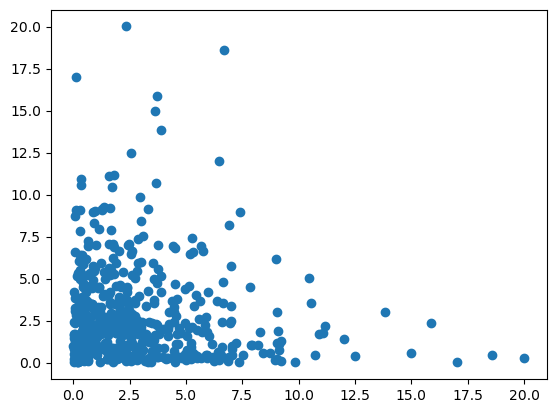

Enter number of intervals : 10
      Intervals                    Frequncy  
------------------------------------------------------------
    (0.003-2.003]              240     
------------------------------------------------------------
    (2.003-4.003]              132     
------------------------------------------------------------
    (4.003-6.003]              66     
------------------------------------------------------------
    (6.003-8.003]              32     
------------------------------------------------------------
    (8.003-10.003]              15     
------------------------------------------------------------
    (10.003-12.003]              7     
------------------------------------------------------------
    (12.003-14.003]              2     
------------------------------------------------------------
    (14.003-16.003]              2     
------------------------------------------------------------
    (16.003-18.003]              1     
----------------

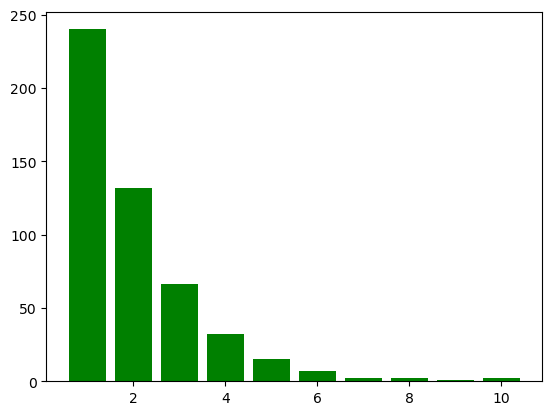

In [6]:
file_path = input("Enter file path : ")
sep = input("Enter file Separator :  ")

# step 1 :- Read the data from file
data = read_Continues_Data(file_path,sep)

# min of data))
min_of_data = min(data)
print("Minimum of data :  " , min_of_data)

# Max of data
max_of_data = max(data)
print("Maximum of data :  ", max_of_data)

# step 2 :- find the Mean and Variance of data
mean = mean_of_data(data)
print("mean : " , mean)

variance = variance_of_data(data,mean)
print("variance : ",variance)


# data Visualization 
# 1 . scatter Graph
scatterPlot(data)

# Number of intervals
intervals = int(input("Enter number of intervals : "))

# 2. draw bar Graph
dic1 = freq_for_graph(data,intervals)
plot_histogram(dic1,intervals)


In [10]:

# min of data
min_of_data = min(data)
print("Minimum of data :  " , min_of_data)

# Max of data
max_of_data = max(data)
print("Maximum of data :  ", max_of_data)

# step 2 :- find the Mean and Variance of data
mean = mean_of_data(data)
print("mean : " , mean)

variance = variance_of_data(data,mean)
print("variance : ",variance)

# step 3 :- find out the parameter values
#x,y = find_parameters(mean,variance)
alpha_value ,beta_value =find_Beta_parameters(mean,variance)
no_parameters = 2
print("")
print("alpha  : ",alpha_value) # 
print("beta : ",beta_value)

# finding beta values
B_of_alpha_and_beta = B_of_alpha_gamma(alpha_value,beta_value)
print("B(alpha,beta) : ",B_of_alpha_and_beta)

# step 4  :- Create frequecy table
frequency_Table = frequency_table(data,intervals)

# step 5  :-  merge the intervals on given threshold 
threshold_frequency = 5 
merge_intervals_table = merge_chi_intervals(frequency_Table,threshold_frequency)
print("")
print("###########################################################################################################################",sep="\n\n")
print("After merging intervals : ")
display(merge_intervals_table)
print("")

# Calculate the degree of freedom  formula : No_of_intervals - No_of_parameters -1
No_of_intervals = len(merge_intervals_table)
degree_of_freedom = No_of_intervals - no_parameters - 1
significance_level=0.05
print("Degree of freedom : ",degree_of_freedom)

# calculate chi_squre_value
chi_square_value = sum([merge_intervals_table[i][3] for i in range(len(merge_intervals_table))])
print("Chi-Square value : ",chi_square_value)

# chi_square value in table on given significate level
chi_square_value_in_table = 11.070
print("chi-Square value in table : ",chi_square_value_in_table)

if chi_square_value <= chi_square_value_in_table:
   print("Given data follows the Beta distribution")
else:
   print("Given data doesn't follow the Beta distribution")


Minimum of data :   0.003
Maximum of data :   20.005
mean :  2.908
variance :  8.47741325000001

alpha  :  -3.562499649406615
beta :  2.33743099417738
gamma value of alpha :  1.8227956655344624e+17
gamma value of beta :  1.1936634637353318
gamma value of alpha or beta :  1089333.6872318
B(alpha,beta) :  199737198372.40512
      Intervals 	 Frequncy_Oi 	 expected Ei 			 area  				(Oi-Ei)^2/Ei  
    0.003-2.003		241		(0.683422957596224-1.09716632789122e-10j)		(0.0013668459151924479-2.19433265578244e-13j)		(84504.12231468865+1.3643441597625755e-05j)    
    2.003-4.003		132		(-4.755697213680016e-11-8.487591856955015e-11j)		(-9.511394427360032e-14-1.6975183713910029e-13j)		(-87541604046460.55+156237323837596.06j)    
    4.003-6.003		66		(-1.0859718942813172e-11-1.9381566556150734e-11j)		(-2.1719437885626343e-14-3.876313311230147e-14j)		(-95840731384598.88+171048949231555.25j)    
    6.003-8.003		32		(-3.895641781185926e-12-6.952633015511357e-12j)		(-7.791283562371852e-15-1.39052660310227

C:\Users\pradip\AppData\Local\Temp\ipykernel_2560\1784141101.py:9: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  gamma_value_alpha,error = quad(lambda x: x**(al-1)*math.exp(-x),0.00001,float("inf"))


TypeError: '<' not supported between instances of 'complex' and 'int'